# Machine Learning Tutorial 
## This Tutorial will go over basic python principles for data analysis using ML. 

Let's start off by importing some useful libraries...

In [2]:
# import useful libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


Next, let's make sure we are working in the correct current working directory.

In [7]:
import os

# Tell us where we are... make sure you are working in the folder where your data is saved.
os.getcwd()


# Tell us where we want to go...
# os.chdir("C:/Users/jacos/Desktop") # Use the path to the folder where your data is located.

# Print again to confirm we are where we want to be.
# os.getcwd()

Okay, good... Now that we are working in the right folder, let's take a quick look at our data. For this example, we are going to see how depression score impacts suicide score. 
    - higher depression score means the patient has a higher occurrence of depressive symptoms.
    - higher suicide score means the patient has a higher likihood of the symptom of suicidal ideation.
    
Sorry for the dark topic, but it is directly related to my current work. 

### **These data are completely fake!** If you would like to see how I generated the dataset of 100 participants, you can find my code in the repository for this workbook. 
For now, all you need to know is that the data were generated to ensure that these two variables are correlated. 

In [24]:
df = pd.read_excel("depression_suicide.xlsx")
df

,depression,suicide
0,3.5,9
1,6.4,25
2,4.8,22
3,6.2,21
4,2.3,5
...,...,...
95,3.0,4
96,NaN,3
97,5.8,26
98,6.8,29


Looks good so far (except it looks like we are missing a few values... that's okay. We'll worry about those in a minute).

### Let's plot these data and see how they look!

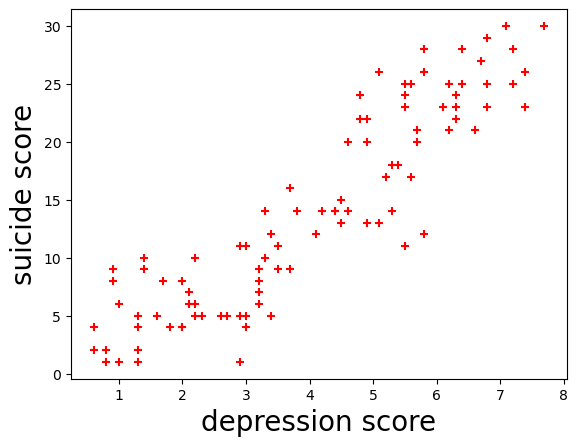

In [53]:
%matplotlib inline  

# Label your x axis.
plt.xlabel('depression score', fontsize = 20) # Remember, your independent variable (IV) should go here.This is your predictor variable. 

# Label y axis.
plt.ylabel('suicide score', fontsize = 20) # Remember, your dependent variable (DV) goes here. This is the thing you are trying to predict.

plt.scatter(df.depression, df.suicide, color = 'red', marker = '+') # Create a scatterplot with red +'s.

### These two variables appear at a glance to be heavily correlated. This is unsurprising, because I made them up and told you they would be. That's okay. Let's look at them a little more deeply anyway.
I would like to move on to linear regression. However, python is not going to like that some of the data are missing. Later, we will talk more about how to handle missing data during preprocessing stages. For now, I will just do the easiest thing, which is to remove the missing data. **Don't worry too much about this now.**


In [28]:
# This will drop all rows (or people) who have any missing data.
df.dropna(inplace=True)

df.tail() # Let's make sure it still looks good.

,depression,suicide
94,1.8,4
95,3.0,4
97,5.8,26
98,6.8,29
99,1.7,8


As you can see, person 96 is no longer visible.

## Linear Regression 

In [29]:
# Create a linear regression object
reg = linear_model.LinearRegression()

# Fit the model for training.
reg.fit(df[['depression']], df.suicide)

LinearRegression()

We didn't see an error. I believe that means that this model is ready to predict suicidal ideation.

In [33]:
# Let's try to predict a person's suicidal ideation score when they have a depression score of 4.3.
reg.predict([[4.3]])

C:\Users\jacos\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.06637559])

Don't worry about that error. It's not important. The important thing is that our model seems to have done a pretty reasonable job of predicting suicidal ideation, given the participant's depression score. 

### Let's talk about why it came up with this value for suicidal ideation...

In order to understand this part, we need to look at the equation for linear regression. This equation is **y = mx + b**, where y is our estimated value (in this case, it is our predicted value for suicidal ideation). m is our coefficient (meaning this is the slope of the model, or how fast it will change for each unit of change), and b is our intercept (this is equivalent to the value of suicidality for a depression score of zero). Of course, x is our value of depression. 

In [40]:
# Look at the values for the coefficient (m)
m = reg.coef_
m

array([3.90552749])

Our value for m is 3.90552749.

In [39]:
# Look at the value for the intercept (b)
b = reg.intercept_
b

-1.727392617266732

Our value for b is -1.727392617266732. So, in other words, when we have a depression score of zero, our estimated suicidality is negative (thank goodness).

**Now we have all the information we need to plug into the equation**
Remember, the value we used for x was 4.3. Let's use that same value here.

In [41]:
x = 4.3
y = (m * x) + b
y

array([15.06637559])

Notice that our estimated value for suicidality with a depression score of 4.3, was 15.066... **The same as before!** Now you know how regression works, and how the model is using regression to make a prediction. 

This may seem very simple. But it is important that this fundamental concept is understood well before getting into the deeper stuff.

### Using our model to predict suicidal ideation for a set of new depression data

Our regression model clearly did well to predict on the data that was used to create it... but how will it do when predicting on entirely new data? Here, I have created another set of 100 participants using the same criteria as before. 

In [42]:
# Let's look at the new dataset...
d = pd.read_excel("depression.xlsx")
d

,Depression Score
0,1.5
1,6.2
2,6.3
3,1.8
4,5.3
...,...
95,1.8
96,3.5
97,7.3
98,7.3


Great! Now, lets use our model to predict on these data...

In [44]:
s = reg.predict(d) # store our values as 's' for suicide predictions.

C:\Users\jacos\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Depression Score
Feature names seen at fit time, yet now missing:
- depression

  warnings.warn(message, FutureWarning)


Again... don't worry about the warning. It's not important.

### Let's add the new predictions into our dataframe.

In [47]:
d['suicide'] = s
d

,Depression Score,suicide
0,1.5,4.130899
1,6.2,22.486878
2,6.3,22.877431
3,1.8,5.302557
4,5.3,18.971903
...,...,...
95,1.8,5.302557
96,3.5,11.941954
97,7.3,26.782958
98,7.3,26.782958


Our dataframe now has both values. Let's save it as its own Excel sheet.

In [50]:
d.to_excel("dprediction.xlsx", index = False) # index is False so that there is not an extra column of index values.

**Now it our predicted data are saved as their own excel file. You can find this new file in the same folder as your current working directory.**

Let's plot our values again and this time include our regression line.

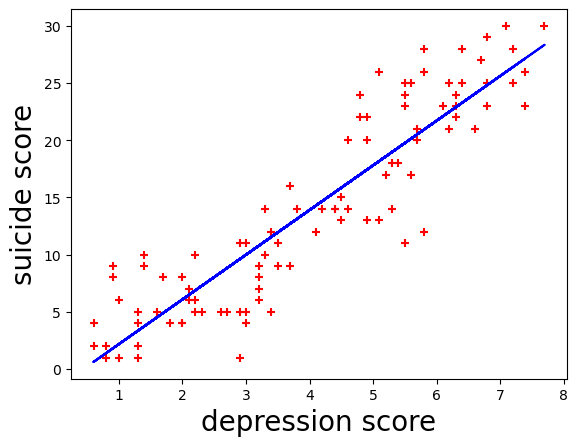

In [58]:
%matplotlib inline  

# Label your x axis.
plt.xlabel('depression score', fontsize = 20) # Remember, your independent variable (IV) should go here.This is your predictor variable. 

# Label y axis.
plt.ylabel('suicide score', fontsize = 20) # Remember, your dependent variable (DV) goes here. This is the thing you are trying to predict.

plt.scatter(df.depression, df.suicide, color = 'red', marker = '+') # Create a scatterplot with red +'s.

plt.plot(df.depression, reg.predict(df[['depression']]), color = 'blue')

### Hey! That looks like it did a pretty good job! 
**This tool is simple, but can be quite powerful. Already, you can probably see many places that this can be quite applicable. However, what if we wanted to use a model to predict suicidality using more variables than just depression? Let's work on that next!

## Linear Regression With Multiple Variables (Multivariate Regression)

This time, we will have numerous variables available. We still have our variable for suicidal ideation and our depression score, but now we have included the patient's age, gender, and traumatic brain injury (TBI) severity.

### This time, we are going to be a little more involved with our dataset. This will be our training set, so it is important that we take time to carefully analyze our data or we could have some serious issues down the road.
First, let's start off by taking a look at our data.

In [76]:
df = pd.read_excel("multi_suicide.xlsx")
df

,Age,Gender,TBI_Severity,Suicide_Score,Depression_Score
0,89.0,Male,Mild,9,3.5
1,98.0,Female,NaN,25,6.4
2,26.0,Female,Severe,22,4.8
3,96.0,Female,Severe,21,6.2
4,35.0,Male,Mild,5,2.3
...,...,...,...,...,...
95,73.0,Male,Mild,4,3.0
96,97.0,Male,Mild,3,NaN
97,65.0,Female,Severe,26,5.8
98,44.0,Male,Severe,29,6.8


### Step 1. Define the problem and get to know your data.


Before we do anything else, it is important that we know as much about our data as humanly possible. The best way to do that is to start of by defining a problem and then designing an experiment aimed at solving that problem. Let's start off by defining the problem:

**The problem** is that people with TBIs appear to be taking their own lives at rates higher than in the general public. We want to design an experiment to help us to understand if TBI severity is related to a person's level of depression, and if it may be a predictor for whether that person might take their own life. Knowing this information may be vital to better inform clinicians and the patients that they treat. 

**The experiment** for this hypothetical dataset (but very **real** problem) aims to assess various aspects about patients in a clinic, all of whom suffer from a traumatic brain injury. It is important that we get to know what our variables are and what they mean:
- **Age** is the patient's age in number of years.
- **Gender** is the patient's self reported gender as either Male or Female (In reality, there are more than two genders, but included only the two for the sake of simplicity, and for practice transforming a categorical variable using binary encoding).
- **TBI Severity** is the severity of the brain injury, as assessed by a physician. This assessment can be either mild, moderate, or severe.
- **Suicidal Ideation Score** is the score given by a psychological assessment. This score is a number that was given based on some valid source of assessment.
- **Depression Score** is the value assigned by a patient's self-report of depressive symptoms via questionnaire form.

**Remember that these values are completely made up and are not actually part of any resource. When analyzing data, it is important that you recognize how those data were collected. You want to know what the numbers mean to the best of your ability. Otherwise, your results will be difficult to interpret. 

### Step 2. Preprocessing the data.

Now that we know what each of our variables mean, we can begin preparing our data for analyses. When we look at our data, we want to watch out for certain things in the data that might tell us something is wrong or needs to be addressed. This stage of analysis is called **preprocessing**. Here are some of the things that we are trying to look out for:
- missing values
- duplicate data
- obvious outliers
- correct formatting
- feature engineering
- scaling
- encoding
    
I will try to go over as many of these as possible, but these are just some of the things that I could think of that we need to look out for.

**Right off, I can see that we have some missing values**

There could be any number of reasons why this could be. Perhaps a participant refused to answer a question, or maybe there was some other circumstance that made it impossible to get certain information. Someone may have forgotten their age, or perhaps they dropped out of the study before they had the chance to complete all the assessments. There is a chance that the patient lied, or perhaps they passed away before they were able to complete the study. Whatever the reasoning, the data is missing and we have to figure out a way to deal with the missing values. 

If we can know why certain elements are missing, this can sometimes give us important insights into how we may want to handle the missing data. 

For instance, when predicting trends in suicide, let's say we find that there are some people that are missing their depression score. We may say that they don't matter in the big picture because we still have so much data to use. We may be tempted to remove their rows entirely. This is often the easiest way to handle missing values. 

However, suppose you were given some divine insight into why that particular value is missing. As it turns out, people who are missing the value for their depression score had actually chosen to take their own life before they had the chance to fill out the self-assessment. 

Knowing this new information, you go back and look at the other values of those people and find that they had greater overall TBI severity compared to others. Or perhaps you find that it actually has to do with the fact that they were younger on average than the other participants in the study. These are important things to consider. If you had just removed the rows altogether, you might find the data skewed in such a way that it looks like TBI severity is not as impactful as it is in reality. 

In reality, it is likely a combination of things that led to the ultimate outcome, and often times, the reason that data is missing will is likely to remain unknown. This is where Step 1 and Step 2 tend to blend together.

**For our purposes, I will say that we don't have any information on why there are missing values. To keep the data from being skewed (and to keep things easy for us for right now), I am going to delete any instances (rows/individuals) where there are any missing values. (Later, we will work on using other methods to handle missing values)**

In [77]:
df.dropna(inplace=True)

df

,Age,Gender,TBI_Severity,Suicide_Score,Depression_Score
0,89.0,Male,Mild,9,3.5
2,26.0,Female,Severe,22,4.8
3,96.0,Female,Severe,21,6.2
4,35.0,Male,Mild,5,2.3
5,30.0,Female,Severe,22,4.9
...,...,...,...,...,...
94,80.0,Female,Mild,4,1.8
95,73.0,Male,Mild,4,3.0
97,65.0,Female,Severe,26,5.8
98,44.0,Male,Severe,29,6.8


Good. It looks like our missing values are all taken care of... however, I notice that we have another problem.

**Our Gender and TBI Severity variables are categorical.**

It will be difficult to perform mathematical analyses on them if they aren't represented as some meaningful number. This is where we talk about the process of **encoding**. Let's first take a look at Gender.

**In this study, gender only has two values: Male and Female. This means that this categorical variable can be easily encoded with the binary values 0 and 1. So let's encode Men as 0 and Women as 1.**


In [78]:
# create dictionary to map values to binary encoding
gender_map = {'Male': 0, 'Female': 1}

# apply mapping to 'Gender' column using the map function
df['Gender'] = df['Gender'].map(gender_map)

print(df)

     Age  Gender TBI_Severity  Suicide_Score  Depression_Score
0   89.0       0         Mild              9               3.5
2   26.0       1       Severe             22               4.8
3   96.0       1       Severe             21               6.2
4   35.0       0         Mild              5               2.3
5   30.0       1       Severe             22               4.9
..   ...     ...          ...            ...               ...
94  80.0       1         Mild              4               1.8
95  73.0       0         Mild              4               3.0
97  65.0       1       Severe             26               5.8
98  44.0       0       Severe             29               6.8
99  69.0       1         Mild              8               1.7

[91 rows x 5 columns]


That appears to have worked well. Now, every person who identified as male is encoded as 0, and every person who identified as female is encoded as 1. 

So far, so good. However, we still have to handle our TBI Severity variable, which is also categorical. The problem is here is that TBI severity can have three values, not two... so binary encoding will not work here. 

Instead we have some other options for how we might encode these values in some meaningful way. I will go over those later. One fairly common way to encode data is known as the "one-hot encoding" (a.k.a. "Dummy encoding") technique. We will cover this later.

**However, our data have a meaningful direction to their values (mild is less than moderate, which is less than severe). Therefore, I think it will be best to use ordinal encoding.**

In [79]:
# Ordinal Encoding

from sklearn.preprocessing import OrdinalEncoder

# create an instance of the OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Mild', 'Moderate', 'Severe']])

# fit the encoder to the 'TBI_Severity' column and transform the values to ordinal integers
df['TBI_Severity'] = encoder.fit_transform(df[['TBI_Severity']])
df

,Age,Gender,TBI_Severity,Suicide_Score,Depression_Score
0,89.0,0,0.0,9,3.5
2,26.0,1,2.0,22,4.8
3,96.0,1,2.0,21,6.2
4,35.0,0,0.0,5,2.3
5,30.0,1,2.0,22,4.9
...,...,...,...,...,...
94,80.0,1,0.0,4,1.8
95,73.0,0,0.0,4,3.0
97,65.0,1,2.0,26,5.8
98,44.0,0,2.0,29,6.8


In [66]:
# # One-Hot Encoding

# # use pandas get_dummies function to create one-hot encoding
# one_hot = pd.get_dummies(df['TBI_Severity'])

# # join the one-hot encoded variables to the original dataframe
# df = df.join(one_hot)

# print(df)

     Age  Gender TBI_Severity  Suicide_Score  Depression_Score  Mild  \
0   89.0       0         Mild              9               3.5     1   
2   26.0       1       Severe             22               4.8     0   
3   96.0       1       Severe             21               6.2     0   
4   35.0       0         Mild              5               2.3     1   
5   30.0       1       Severe             22               4.9     0   
..   ...     ...          ...            ...               ...   ...   
94  80.0       1         Mild              4               1.8     1   
95  73.0       0         Mild              4               3.0     1   
97  65.0       1       Severe             26               5.8     0   
98  44.0       0       Severe             29               6.8     0   
99  69.0       1         Mild              8               1.7     1   

    Moderate  Severe  
0          0       0  
2          0       1  
3          0       1  
4          0       0  
5          0       1

### Great! Now all of our data appear to be useable for analyses! 

Let's assume that we are finished with the preprocessing stage of analyses. We resolved missing data, and we found no duplicates or outliers. All of our categorical variables are properly encoded. Time to move on to the next step!

## Step 3. Explore the data.

Before we continue, let's take a moment to back up and look at the data again, before we had made any changes...

In [30]:
df = pd.read_excel("multi_suicide.xlsx")
df.head()

,Age,Gender,TBI_Severity,Suicide_Score,Depression_Score
0,89.0,Male,Mild,9.0,3.5
1,98.0,Female,NaN,25.0,6.4
2,NaN,Female,Severe,NaN,4.8
3,96.0,Female,Severe,21.0,6.2
4,35.0,Male,Mild,5.0,2.3


Now, we can see that our missing variables have returned. 

Sometimes, it will make sense to remove the row entirely, especially if we have reason to believe that there may be something wrong with that participant's data. However, other times we don't want to throw it all out just because something is missing. The remaining information may still be useful. 

Let's take a look at **participant number 2** for example... notice that she is missing the value for her age. We know everything else about her, and her age may not be the most useful bit of information. Let's take a look at the distribution of ages among our participants.

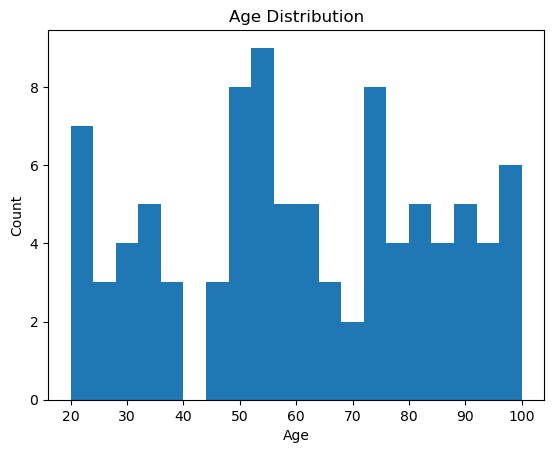

In [31]:
# Select the Age column and drop any rows with missing values
ages = df['Age'].dropna()

# Plot a histogram of the age distribution
plt.hist(ages, bins=20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

There appears to be a somewhat random distribution of ages. This does not appear to be a normal distribution. However, we do have an option available to use that is robust, meaning it will not be affected by outliers or the shape of the distribution. 

Our answer here is to **replace our missing age values with the median age**. 

First, let's take a look at what our median age is.

In [32]:
df['Age'].median()

59.0

Okay, now that we know what it is, let's use it to substitute our missing values.

In [33]:
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)
df.head()

,Age,Gender,TBI_Severity,Suicide_Score,Depression_Score
0,89.0,Male,Mild,9.0,3.5
1,98.0,Female,NaN,25.0,6.4
2,59.0,Female,Severe,NaN,4.8
3,96.0,Female,Severe,21.0,6.2
4,35.0,Male,Mild,5.0,2.3


Great! Notice that participant number 2 now has an age equal to the median value!

However, we still have a problem. Notice that **TBI Severity** is also missing values. However, this variable is categorical. One nice thing that makes the process a little simpler is that this variable's levels are ordinal, meaning there is a directionality to the levels of the variable (Mild is less than Moderate which is less than Severe). 

The best way to go about replacing missing variables here will likely be to replace the ones that are missing with whichever option appears the most.  

Keep in mind that if you have non-numerical data like we do, you can use the mode as I have done below. However, if you first convert the column into numerical data (like we did before), you can also replace missing values with the median instead. Let's see how the two differ.

In [34]:
df['TBI_Severity'].mode()

0    Mild
Name: TBI_Severity, dtype: object

It says that 'Mild' is the most common TBI_Severity. If we quickly encode the levels numerically, we can try to use the median instead. Let's see how that looks. First, encode the variables numerically:

In [35]:
severity_mapping = {'Mild': 1, 'Moderate': 2, 'Severe': 3}

# Replace the categorical values with numerical values
df['TBI_Severity'] = df['TBI_Severity'].replace(severity_mapping)

# Print the updated data
print(df)

     Age  Gender  TBI_Severity  Suicide_Score  Depression_Score
0   89.0    Male           1.0            9.0               3.5
1   98.0  Female           NaN           25.0               6.4
2   59.0  Female           3.0            NaN               4.8
3   96.0  Female           3.0           21.0               6.2
4   35.0    Male           1.0            5.0               2.3
..   ...     ...           ...            ...               ...
95  73.0    Male           1.0            4.0               3.0
96  97.0    Male           1.0            3.0               NaN
97  65.0  Female           3.0           26.0               5.8
98  44.0    Male           3.0           29.0               6.8
99  69.0  Female           1.0            8.0               1.7

[100 rows x 5 columns]


Now, find the median...

In [36]:
df['TBI_Severity'].median()

2.0

Notice we have two different outcomes, so what we choose to do matters. When we took the most common instance, we found that 'Mild' was the most likely to occur. However, when we try to take the middle value, we were practically destined to pick 2.0 (equivalent to 'Moderate'), unless the data are **HEAVILY SKEWED** one way or another. 

To me, it makes more sense to replace the missing values with the most common occurance. So let's do that.

In [37]:
df['TBI_Severity'].fillna(df['TBI_Severity'].mode()[0], inplace=True)
df.head()

,Age,Gender,TBI_Severity,Suicide_Score,Depression_Score
0,89.0,Male,1.0,9.0,3.5
1,98.0,Female,1.0,25.0,6.4
2,59.0,Female,3.0,NaN,4.8
3,96.0,Female,3.0,21.0,6.2
4,35.0,Male,1.0,5.0,2.3


**Note:** there is some risk to this approach, in that if there is a systematic reason that the values are missing, then the data will be skewed away from the truth. If that is the case, then replacing these values with the most common value may skew the data even further from the truth. 

However, if the missing values are just missing at random (usually the case), then there should be no problem.

Our variable is still encoded numerically, which is a good thing because we need it to be in order to make any sense of the data, statistically.  

**Just to get it out of the way, let's use binary encoding to switch gender over to numerical data as well.**

In [38]:
# Encode Gender as binary
df['Gender'] = pd.factorize(df['Gender'])[0]
df.head()

,Age,Gender,TBI_Severity,Suicide_Score,Depression_Score
0,89.0,0,1.0,9.0,3.5
1,98.0,1,1.0,25.0,6.4
2,59.0,1,3.0,NaN,4.8
3,96.0,1,3.0,21.0,6.2
4,35.0,0,1.0,5.0,2.3


Finally, we need to handle the missing values for 'Suicide_Score' and 'Depression_Score'... however, these numbers are highly variable.

It may be in your best interest to remove these participants altogether because arguably those scores are more important parts of the data regarding the problem we are trying to solve. 

However, if we have the time and feel that it is of value for us to replace these values with a "best guess", we can implement machine learning to impute the missing values based on the information available to us from the other variables. **This may be particularly useful if you do not have many participants, or if it is vital that you retain all the participants in your data for whatever reason.**

### Using machine learning on the data that you do have to predict the data that you don't have.

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer

# Create a new DataFrame without missing values
notnull = df.dropna()

# Split the data into training and test sets
X_train = notnull[['Age', 'Gender', 'TBI_Severity', 'Suicide_Score', 'Depression_Score']]
y_train_suicide = notnull['Suicide_Score']
y_train_depression = notnull['Depression_Score']

# Create the imputer
imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)

# Fit and transform the imputer
imputed_data1 = imputer.fit_transform(X_train[['Age', 'Gender', 'TBI_Severity', 'Suicide_Score']])
imputed_data2 = imputer.fit_transform(X_train[['Age', 'Gender', 'TBI_Severity', 'Depression_Score']])

# Rename the columns in the imputed data
imputed_data1 = pd.DataFrame(imputed_data1, columns=['Age', 'Gender', 'TBI_Severity', 'Suicide_Score'])
imputed_data2 = pd.DataFrame(imputed_data2, columns=['Age', 'Gender', 'TBI_Severity', 'Depression_Score'])

# Print out the imputed data
print("Imputed data for Suicide_Score:\n", imputed_data1)
print("Imputed data for Depression_Score:\n", imputed_data2)

Imputed data for Suicide_Score:
      Age  Gender  TBI_Severity  Suicide_Score
0   89.0     0.0           1.0            9.0
1   98.0     1.0           1.0           25.0
2   96.0     1.0           3.0           21.0
3   35.0     0.0           1.0            5.0
4   30.0     1.0           3.0           22.0
..   ...     ...           ...            ...
90  80.0     1.0           1.0            4.0
91  73.0     0.0           1.0            4.0
92  65.0     1.0           3.0           26.0
93  44.0     0.0           3.0           29.0
94  69.0     1.0           1.0            8.0

[95 rows x 4 columns]
Imputed data for Depression_Score:
      Age  Gender  TBI_Severity  Depression_Score
0   89.0     0.0           1.0               3.5
1   98.0     1.0           1.0               6.4
2   96.0     1.0           3.0               6.2
3   35.0     0.0           1.0               2.3
4   30.0     1.0           3.0               4.9
..   ...     ...           ...               ...
90  80.0     

In [46]:
# Fit the imputer to the original data
imputer.fit(df)

# Impute missing values in the original data
imputed_data = imputer.transform(df)

# Create a new DataFrame with the imputed data
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

# Replace missing values in the original DataFrame with the imputed values
df[['Suicide_Score', 'Depression_Score']] = imputed_df[['Suicide_Score', 'Depression_Score']]

df

,Age,Gender,TBI_Severity,Suicide_Score,Depression_Score
0,89.0,0,1.0,9.00,3.500
1,98.0,1,1.0,25.00,6.400
2,59.0,1,3.0,23.67,4.800
3,96.0,1,3.0,21.00,6.200
4,35.0,0,1.0,5.00,2.300
...,...,...,...,...,...
95,73.0,0,1.0,4.00,3.000
96,97.0,0,1.0,3.00,2.915
97,65.0,1,3.0,26.00,5.800
98,44.0,0,3.0,29.00,6.800


**It looks like all ov our missing values have been resolved, and we got to keep all 100 of our participants! Not only that, but our variables are all encoded in a way that makes them useable for analyses. SUCCESS!**

But our job is not over yet. There is more work to do.